<a href="https://colab.research.google.com/github/leeJuly070/Curah-Hujan/blob/main/julianti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

inport liblary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate, KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from imblearn.over_sampling import RandomOverSampler

In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving Data.xlsx to Data.xlsx


In [4]:
for file_name in uploaded.keys():
    print(f'Nama file yang diunggah: {file_name}')



Nama file yang diunggah: Data.xlsx


Prepocessing Data

In [5]:
def cleaning(df, col_name):
    df = df.melt(id_vars=["Date"], var_name="Month", value_name=col_name)
    df = df[~((df["Month"] == "Feb") & (df["Date"] > 29))]
    df["Date"] = pd.to_datetime(df["Month"] + " " + df["Date"].astype(str) + " 2024")
    df.set_index("Date", inplace=True)
    df.drop(columns=["Month"], inplace=True)
    df.index.name = None

    return df

In [6]:
suhu_rata_rata = pd.read_excel("Data.xlsx", sheet_name="Suhu Rata-rata")
curah_hujan = pd.read_excel("Data.xlsx", sheet_name="Curah Hujan Teluk Bayur")
tekanan_udara = pd.read_excel("Data.xlsx", sheet_name="Tekanan Udara")
kelembapan_udara = pd.read_excel("Data.xlsx", sheet_name="Kelembapan Udara")
penguapan = pd.read_excel("Data.xlsx", sheet_name="Penguapan")
lama_penyinaran = pd.read_excel("Data.xlsx", sheet_name="Lama Penyinaran")

In [7]:
data_list = []

for data, col_name in zip(
    [suhu_rata_rata, curah_hujan, tekanan_udara, kelembapan_udara, penguapan, lama_penyinaran],
    ["suhu_rata_rata", "curah_hujan", "tekanan_udara", "kelembapan_udara", "penguapan", "lama_penyinaran"]
):
    new_data = cleaning(data, col_name)
    data_list.append(new_data)

In [8]:
df = pd.concat(data_list, axis=1)

for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df[col].fillna(0)

df = df.reset_index(drop=True)
df

,suhu_rata_rata,curah_hujan,tekanan_udara,kelembapan_udara,penguapan,lama_penyinaran
0,27.4,2.6,1010.3,86,4.1,79
1,27.1,11.0,1009.7,89,7.1,59
2,26.4,10.6,1010.8,89,0.0,20
3,27.2,4.6,1010.2,84,3.7,79
4,26.9,0.0,1010.1,88,4.6,84
...,...,...,...,...,...,...
86,28.3,1.5,1012.7,86,1.6,28
87,28.4,1.8,1010.9,86,5.9,60
88,28.0,0.0,1010.0,84,4.2,76
89,28.1,1.0,1011.7,86,0.6,66


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1O-NrEgL6w3u25cHn_7-DgJNx-lCkHI7K4q8gicyfBP4#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


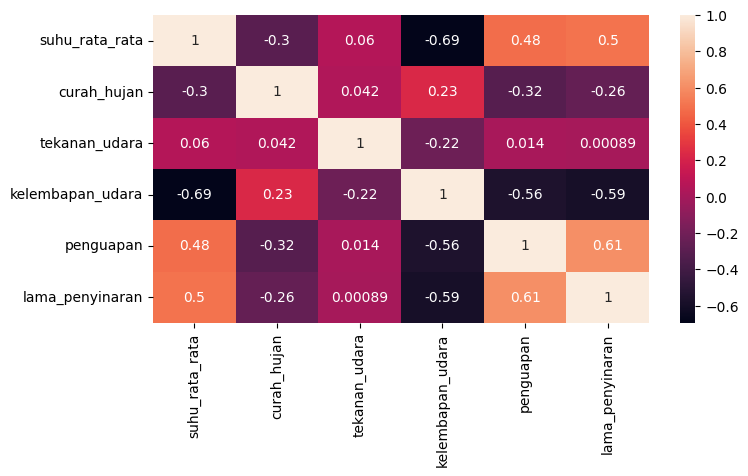

In [9]:
plt.figure(figsize=(8, 4), dpi=100)
sns.heatmap(data=df.corr(), annot=True)
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   suhu_rata_rata    91 non-null     float64
 1   curah_hujan       91 non-null     float64
 2   tekanan_udara     91 non-null     float64
 3   kelembapan_udara  91 non-null     int64  
 4   penguapan         91 non-null     float64
 5   lama_penyinaran   91 non-null     int64  
dtypes: float64(4), int64(2)
memory usage: 4.4 KB


In [11]:
df.shape

(91, 6)

In [12]:
def rain_fall_categorization(value):
    if value <= 10:
        return "Light Rain"
    elif value <= 30:
        return "Moderate Rain"
    elif value <= 70:
        return "Heavy Rain"
    else:
        return "Very Heavy Rain"

df["curah_hujan"] = df["curah_hujan"].apply(rain_fall_categorization)
df

,suhu_rata_rata,curah_hujan,tekanan_udara,kelembapan_udara,penguapan,lama_penyinaran
0,27.4,Light Rain,1010.3,86,4.1,79
1,27.1,Moderate Rain,1009.7,89,7.1,59
2,26.4,Moderate Rain,1010.8,89,0.0,20
3,27.2,Light Rain,1010.2,84,3.7,79
4,26.9,Light Rain,1010.1,88,4.6,84
...,...,...,...,...,...,...
86,28.3,Light Rain,1012.7,86,1.6,28
87,28.4,Light Rain,1010.9,86,5.9,60
88,28.0,Light Rain,1010.0,84,4.2,76
89,28.1,Light Rain,1011.7,86,0.6,66


In [13]:
df.to_excel("Cleaned Data.xlsx", index=False)

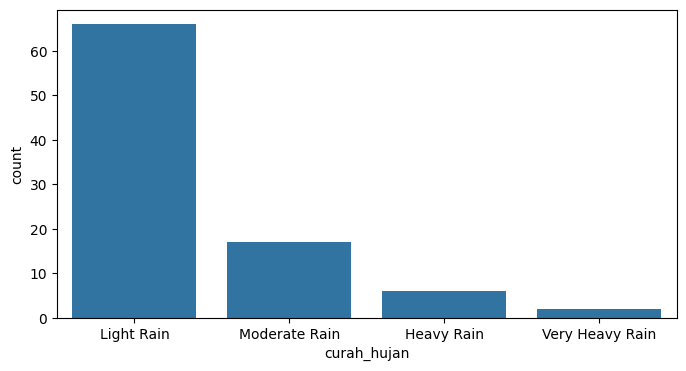

In [14]:
plt.figure(figsize=(8, 4), dpi=100)
sns.countplot(
    data=df,
    x="curah_hujan",
    order=["Light Rain", "Moderate Rain", "Heavy Rain", "Very Heavy Rain"]
)
plt.show()

Pembagian Data Set

In [15]:
X = df.drop("curah_hujan", axis=1)
y = df["curah_hujan"]

In [16]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((68, 5), (23, 5), (68,), (23,))

In [18]:
ros = RandomOverSampler(random_state=101)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [19]:
X_train.head()

,suhu_rata_rata,tekanan_udara,kelembapan_udara,penguapan,lama_penyinaran
22,27.7,1012.3,82,4.4,80
61,27.5,1010.3,86,0.0,46
39,27.5,1011.4,89,1.9,35
89,28.1,1011.7,86,0.6,66
59,27.6,1007.6,83,6.0,93


In [20]:
X_test.head()

,suhu_rata_rata,tekanan_udara,kelembapan_udara,penguapan,lama_penyinaran
24,28.2,1012.6,82,5.9,100
27,28.1,1012.1,83,5.4,0
36,28.2,1013.6,82,4.1,78
75,27.2,1012.7,80,4.6,9
54,27.8,1011.0,84,4.5,60


pemodelan Naive Bayes

In [21]:
gnb_model = GaussianNB()
gnb_model.fit(X_resampled, y_resampled)

GaussianNB()

In [22]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = cross_validate(gnb_model, X_resampled, y_resampled, cv=cv, scoring="accuracy", return_train_score=True)

In [23]:
results_df = pd.DataFrame({
    "Fold": np.tile(range(1, cv.get_n_splits() + 1), 2),
    "Accuracy": np.concatenate([results["train_score"], results["test_score"]]),
    "Type": ["Train"] * len(results["train_score"]) + ["Test"] * len(results["test_score"])
})

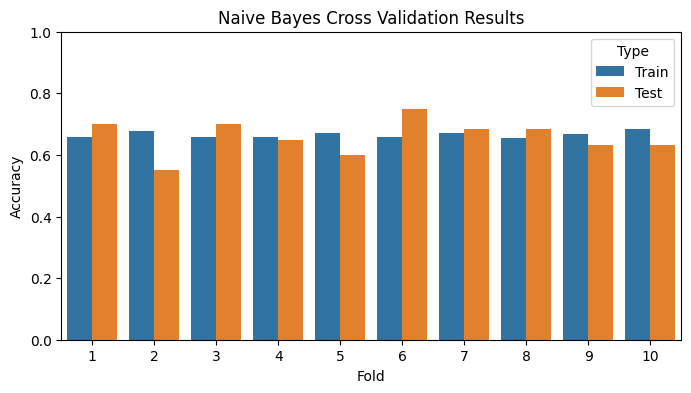

In [24]:
plt.figure(figsize=(8, 4), dpi=100)
sns.barplot(data=results_df, x="Fold", y="Accuracy", hue="Type")
plt.title("Naive Bayes Cross Validation Results")
plt.ylim(0, 1)
plt.show()

In [25]:
gnb_y_pred = gnb_model.predict(X_test)
gnb_test_accuracy = accuracy_score(y_test, gnb_y_pred)
print(f"Gaussian Naive Bayes Test set accuracy: {gnb_test_accuracy}")

Gaussian Naive Bayes Test set accuracy: 0.6086956521739131


In [26]:
gnb_y_pred = gnb_model.predict(X_test)

print(classification_report(le.inverse_transform(y_test), le.inverse_transform(gnb_y_pred), zero_division=0))

                 precision    recall  f1-score   support

     Heavy Rain       0.25      0.50      0.33         2
     Light Rain       0.87      0.76      0.81        17
  Moderate Rain       0.00      0.00      0.00         4
Very Heavy Rain       0.00      0.00      0.00         0

       accuracy                           0.61        23
      macro avg       0.28      0.32      0.29        23
   weighted avg       0.66      0.61      0.63        23



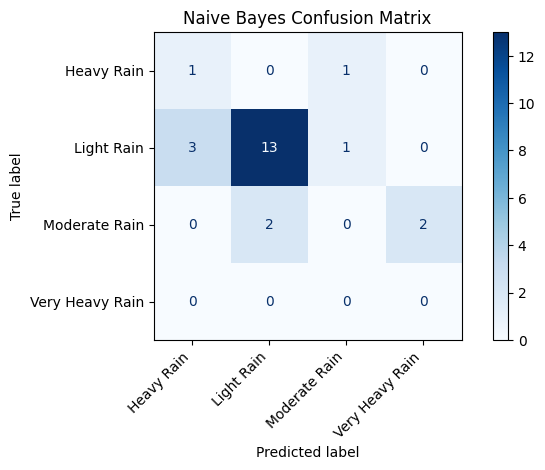

In [27]:
cm = confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(gnb_y_pred), labels=le.classes_)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=le.classes_
)

fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
disp.plot(ax=ax, cmap="Blues")
plt.title("Naive Bayes Confusion Matrix")
plt.xticks(rotation=45, ha="right")
plt.show()

In [28]:
gnb_y_pred = gnb_model.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, gnb_y_pred)))

Model accuracy score: 0.6087


In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, gnb_y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 1  0  1  0]
 [ 3 13  1  0]
 [ 0  2  0  2]
 [ 0  0  0  0]]

True Positives(TP) =  1

True Negatives(TN) =  13

False Positives(FP) =  0

False Negatives(FN) =  3


In [31]:
import pandas as pd
import numpy as np


In [32]:
y_actual = pd.Series(np.array(y_test), name="actual")
y_predict = pd.Series(np.array(gnb_y_pred), name="prediction")

In [33]:
Data_confusion = pd.crosstab(y_actual, y_predict)

In [34]:
print(Data_confusion)

prediction  0   1  2  3
actual                 
0           1   0  1  0
1           3  13  1  0
2           0   2  0  2
